In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def create_percentile_polar_plot(data, player_column, players,stats_columns, group_column=None):
    # If a group column is provided, use it to differentiate players
    hue_order = None
    if group_column:
        hue_order = data[group_column].unique()


    percentiles_data = data[stats_columns].ransk(pct=True)

# Display original DataFrame with percentiles
    print("Original DataFrame with Percentiles:")
    print(pd.concat([data, percentiles_data.add_suffix('_percentile')], axis=1))

# Filter specific rows while preserving percentiles
    filtered_rows = data[data['Player'].isin(players)]

# Display filtered DataFrame with percentiles
    print("\nFiltered DataFrame with Original Percentiles:")
    data = pd.concat([filtered_rows, percentiles_data.loc[filtered_rows.index].add_suffix('_percentile')], axis=1)

    # Create a DataFrame for polar plot
    polar_data = data[[f'{stat}_percentile' for stat in stats_columns] + [player_column, group_column]] \
        .melt(id_vars=[player_column, group_column], var_name='Stat', value_name='Percentile')

    print(polar_data)
    # Create polar plot using seaborn
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)

    for player in polar_data[player_column].unique():
        player_data = polar_data[polar_data[player_column] == player]
        angles = [i / float(len(stats_columns)) * 2 * 3.14159 for i in range(len(stats_columns))]
        values = player_data['Percentile'].tolist()

        # Close the plot
        values += values[:1]
        angles += angles[:1]

        # If a group column is provided, use it for differentiation
        if group_column:
            group_value = player_data[group_column].iloc[0]
            label = f"{player} ({group_value})"
        else:
            label = player

        ax.plot(angles, values, label=label)

    # Set labels and title
    plt.xticks(angles[:-1], stats_columns)
    plt.title('Polar Comparison of Basketball Players Stats (Percentiles)')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), title=group_column)

    plt.show()



Original DataFrame with Percentiles:
      Rk            Player   Pos  Age   Tm   G  GS    MP   FG   FGA  ...  \
0      1  Precious Achiuwa  C-PF   24  TOT  45   6  19.9  3.1   6.5  ...   
1      1  Precious Achiuwa     C   24  TOR  25   0  17.5  3.1   6.8  ...   
2      1  Precious Achiuwa    PF   24  NYK  20   6  22.9  3.1   6.1  ...   
3      2       Bam Adebayo     C   26  MIA  42  42  34.5  7.6  15.0  ...   
4      3      Ochai Agbaji    SG   23  UTA  51  10  19.7  2.1   4.9  ...   
..   ...               ...   ...  ...  ...  ..  ..   ...  ...   ...  ...   
586  533    Thaddeus Young    PF   35  TOR  23   6  15.2  2.3   3.8  ...   
587  534        Trae Young    PG   25  ATL  47  47  36.7  8.5  19.7  ...   
588  535    Omer Yurtseven     C   25  UTA  28   6   9.5  1.4   2.9  ...   
589  536       Cody Zeller     C   31  NOP  36   0   8.0  0.6   1.5  ...   
590  537       Ivica Zubac     C   26  LAC  40  40  26.7  5.2   7.9  ...   

     Player-additional   REB          Player_Name 

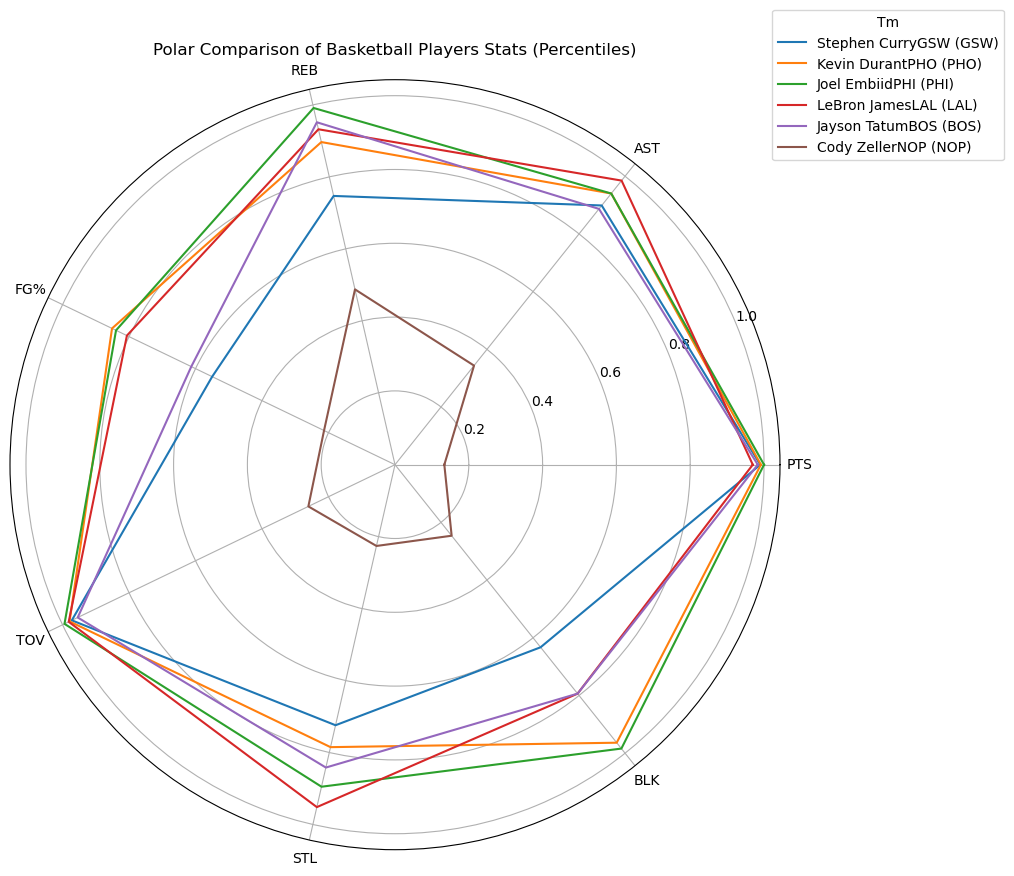

In [44]:
df = pd.read_csv('NBAPlayerStats.csv')
df['REB'] = df['ORB']+df['DRB']
df['Player_Name'] = df['Player']+df['Tm']
stats_columns = ['PTS', 'AST', 'REB', 'FG%', 'TOV','STL','BLK']
players = ['LeBron James','Stephen Curry','Kevin Durant','Luka Doncic','Jayson Tatum','Joel Embiid','Nikola Jokic','Cody Zeller'] #They got the weird C's

create_percentile_polar_plot(df, 'Player_Name', players, stats_columns,group_column='Tm')

In [30]:
import pandas as pd

# Sample DataFrame
data = {
    'Player': ['Player A', 'Player B', 'Player C', 'Player D', 'Player E'],
    'Points': [20, 15, 25, 18, 22],
    'Assists': [8, 5, 10, 7, 9],
    'Rebounds': [10, 8, 12, 9, 11],
    'Steals': [2, 1, 3, 2, 4],
    'Blocks': [1, 0, 2, 1, 2],
}

df = pd.DataFrame(data)

df

,Player,Points,Assists,Rebounds,Steals,Blocks
0,Player A,20,8,10,2,1
1,Player B,15,5,8,1,0
2,Player C,25,10,12,3,2
3,Player D,18,7,9,2,1
4,Player E,22,9,11,4,2


In [31]:
# Calculate percentiles for all columns
percentiles_df = df.rank(pct=True)

# Display original DataFrame with percentiles
print("Original DataFrame with Percentiles:")
pd.concat([df, percentiles_df.add_suffix('_percentile')], axis=1)


Original DataFrame with Percentiles:


,Player,Points,Assists,Rebounds,Steals,Blocks,Player_percentile,Points_percentile,Assists_percentile,Rebounds_percentile,Steals_percentile,Blocks_percentile
0,Player A,20,8,10,2,1,0.2,0.6,0.6,0.6,0.5,0.5
1,Player B,15,5,8,1,0,0.4,0.2,0.2,0.2,0.2,0.2
2,Player C,25,10,12,3,2,0.6,1.0,1.0,1.0,0.8,0.9
3,Player D,18,7,9,2,1,0.8,0.4,0.4,0.4,0.5,0.5
4,Player E,22,9,11,4,2,1.0,0.8,0.8,0.8,1.0,0.9


In [32]:


# Filter specific rows while preserving percentiles
filtered_rows = df[df['Player'].isin(['Player A', 'Player C'])]

# Display filtered DataFrame with percentiles
print("\nFiltered DataFrame with Original Percentiles:")
pd.concat([filtered_rows, percentiles_df.loc[filtered_rows.index].add_suffix('_percentile')], axis=1)



Filtered DataFrame with Original Percentiles:


,Player,Points,Assists,Rebounds,Steals,Blocks,Player_percentile,Points_percentile,Assists_percentile,Rebounds_percentile,Steals_percentile,Blocks_percentile
0,Player A,20,8,10,2,1,0.2,0.6,0.6,0.6,0.5,0.5
2,Player C,25,10,12,3,2,0.6,1.0,1.0,1.0,0.8,0.9
